In [2]:
import torch
import numpy as np
import cv2
import pickle
import json
from torchvision import datasets, models, transforms
from PIL import Image
from torch import nn
import torch.optim as optim
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt


In [3]:
img_name = './IDD_Segmentation/leftImg8bit/train/0/005506_leftImg8bit.png'
gt_name = './IDD_Segmentation/gtFine/train/0/005506_gtFine_polygons.json'

In [4]:
with Image.open(img_name) as img:
    im = img.convert('RGB')

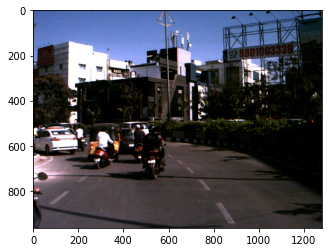

In [5]:
plt.imshow(im)

In [49]:
with open(gt_name) as f:
    data = json.load(f)

In [59]:
imgHeight = data['imgHeight']
imgWidth = data['imgWidth']
labels = data['objects']

gt_mask = np.zeros((imgHeight,imgWidth,3), dtype=np.uint8)
colors = {}

In [60]:
for label in labels:
    if label['label'] not in colors.keys():
        colors[label['label']] = list(map(int,list(np.random.choice(range(256), size=3))))
        
    color = colors[label['label']]  

    polygon = np.asarray(label['polygon'], dtype=np.int32)
    
    if(label['draw']):
        cv2.fillPoly(gt_mask,[polygon],color)

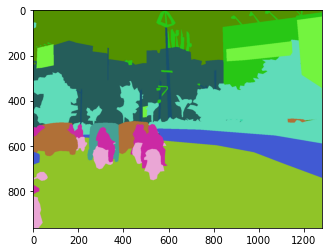

In [61]:
plt.imshow(gt_mask)